In [52]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import cv2
import numpy as np
import pickle
import glob
from image_process import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
def to_rgb(image):
    return np.flip(image,axis=2)

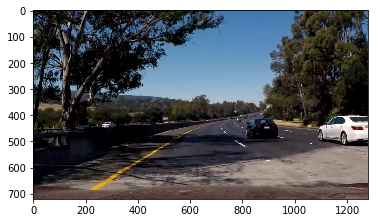

In [54]:
difficult_image=cv2.imread("./test_images/shadow_1.jpg")
plt.imshow(np.flip(difficult_image,axis=2))

## Filter yellow and white parts

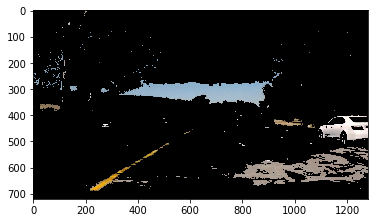

In [55]:
cf=ColorFilter()
wy_image=cf.transform(difficult_image,mask=False)
plt.imshow(to_rgb(wy_image))

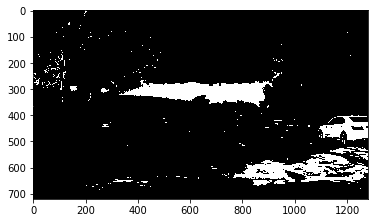

In [56]:
white_binary=cf._filter_white(difficult_image)
plt.imshow(white_binary,cmap='gray')

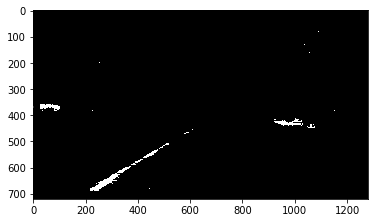

In [57]:
yellow_binary=cf._filter_yellow(difficult_image)
plt.imshow(yellow_binary,cmap='gray')

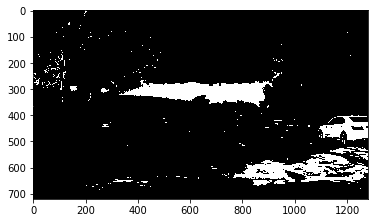

In [58]:
white_binary=cf._filter_white(difficult_image)
plt.imshow(white_binary,cmap='gray')

## To gray space

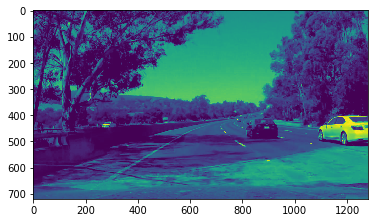

In [59]:
gray=cv2.cvtColor(difficult_image,cv2.COLOR_RGB2GRAY)
plt.imshow(gray)

## To HSV space

In [60]:
hsv=cv2.cvtColor(difficult_image,cv2.COLOR_RGB2HSV)

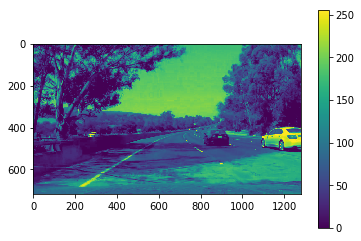

In [61]:
plt.imshow(hsv[:,:,2])
plt.colorbar()

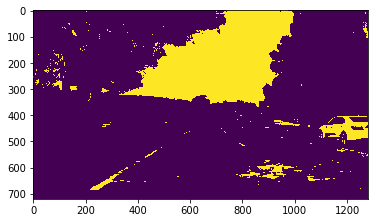

In [62]:
v_binary=hsv_select(difficult_image,thresh=(170,255),channel=2)
plt.imshow(v_binary)

## To HLS space

In [63]:
hls=cv2.cvtColor(difficult_image,cv2.COLOR_RGB2HLS)

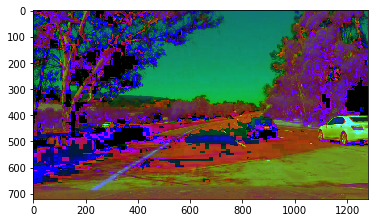

In [64]:
plt.imshow(hls)

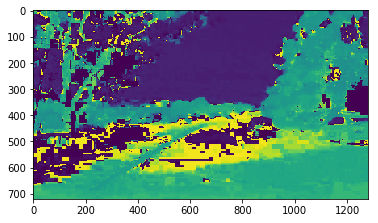

In [65]:
plt.imshow(hls[:,:,0])

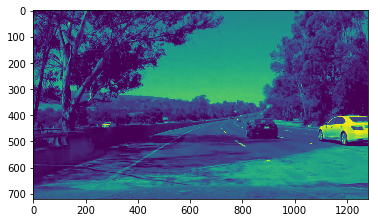

In [66]:
plt.imshow(hls[:,:,1])

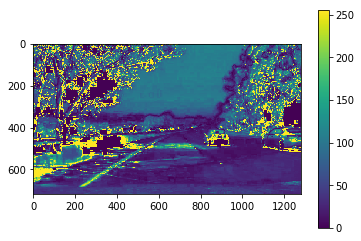

In [67]:
plt.imshow(hls[:,:,2])
plt.colorbar()

## Color filtered image in HLS space

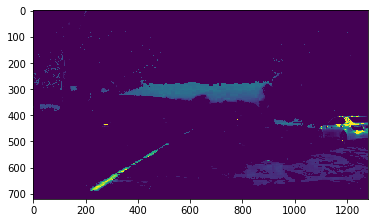

In [68]:
wy_hls=cv2.cvtColor(wy_image,cv2.COLOR_RGB2HLS)
plt.imshow(wy_hls[:,:,2])

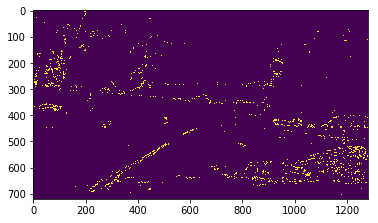

In [69]:
ksize=3
gradx = abs_sobel_thresh(wy_image, orient='x', sobel_kernel=ksize, thresh=(20, 100))
plt.imshow(gradx)

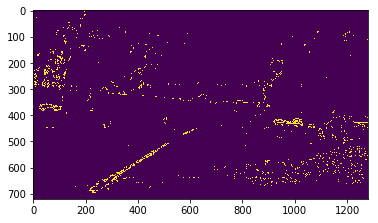

In [70]:
ksize=3
grady = abs_sobel_thresh(wy_image, orient='y', sobel_kernel=ksize, thresh=(20, 100))
plt.imshow(grady)

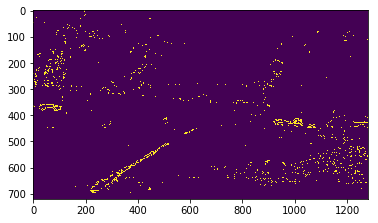

In [71]:
mag_binary=mag_thresh(wy_image,mag_thresh=(30,100))
plt.imshow(mag_binary)

## Creating masks

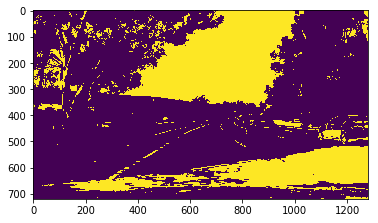

In [72]:
s_binary_1=hls_select(difficult_image,thresh=(100,200),channel=1)
plt.imshow(s_binary_1)

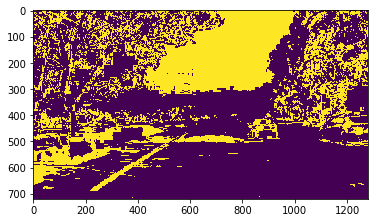

In [73]:
s_binary_2=hls_select(difficult_image,thresh=(90,255),channel=2)
plt.imshow(s_binary_2)

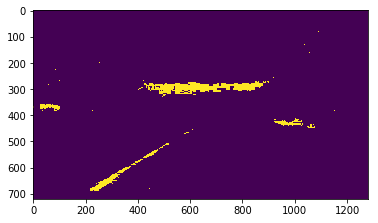

In [90]:
combined=np.zeros_like(s_binary_2)
combined[((s_binary_2==1) & (white_binary==255) & (s_binary_1==1))|(yellow_binary==255)]=1
plt.imshow(combined)

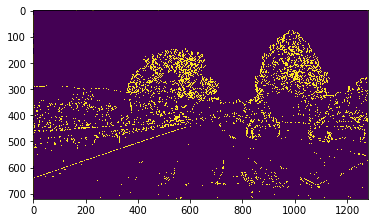

In [24]:
ksize=3
gradx = abs_sobel_thresh(difficult_image, orient='x', sobel_kernel=ksize, thresh=(20, 100))
plt.imshow(gradx)

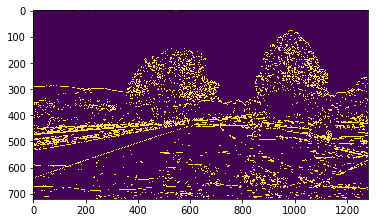

In [25]:
ksize=3
grady = abs_sobel_thresh(difficult_image, orient='y', sobel_kernel=ksize, thresh=(20, 100))
plt.imshow(grady)

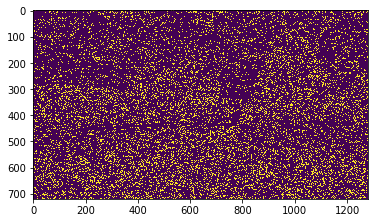

In [26]:
dir_binary=dir_threshold(difficult_image,thresh=(0.9,1.2),sobel_kernel=3)
plt.imshow(dir_binary)

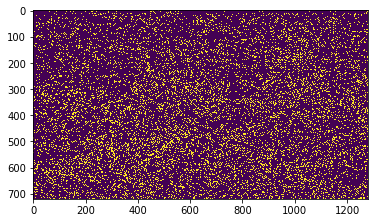

In [27]:
dir_binary_2=dir_threshold(hls[:,:,2],thresh=(0.9,1.2),sobel_kernel=3,to_gray=False)
plt.imshow(dir_binary_2)

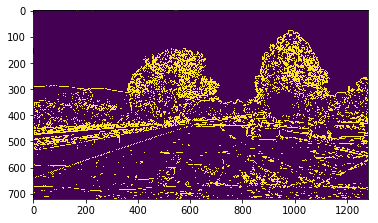

In [28]:
mag_binary=mag_thresh(difficult_image,mag_thresh=(20,100))
plt.imshow(mag_binary)

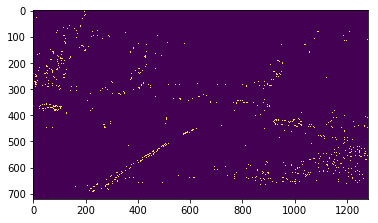

In [75]:
combined=np.zeros_like(dir_binary)
combined[((gradx==1) & (grady==1))]=1
plt.imshow(combined)

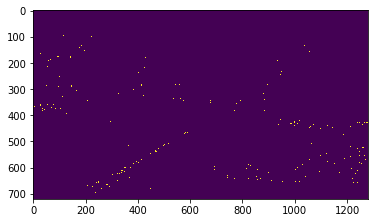

In [76]:
combined=np.zeros_like(dir_binary)
combined[((dir_binary==1) & (mag_binary==1))]=1
plt.imshow(combined)

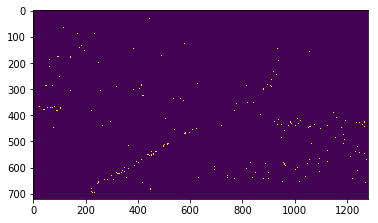

In [77]:
combined=np.zeros_like(dir_binary)
combined[((dir_binary_2==1) & (mag_binary==1))]=1
plt.imshow(combined)

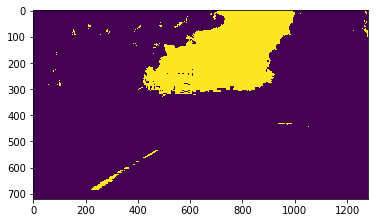

In [78]:
combined=np.zeros_like(dir_binary)
combined[(s_binary_1==1) & (s_binary_2==1)]=1
plt.imshow(combined)

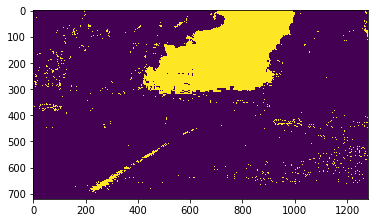

In [79]:
combined=np.zeros_like(dir_binary)
combined[((dir_binary==1) & (mag_binary==1))|((gradx==1) &(grady==1))|((s_binary_1==1) & (s_binary_2==1))]=1
plt.imshow(combined)

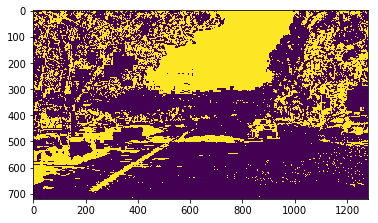

In [80]:
combined=np.zeros_like(dir_binary)
combined[((dir_binary==1) & (mag_binary==1))|((gradx==1) &(grady==1))|((s_binary_2==1))]=1
plt.imshow(combined)

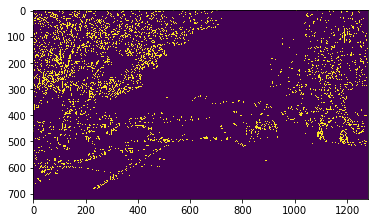

In [81]:
_,ege_image=edge_pipeline(difficult_image)
plt.imshow(ege_image)

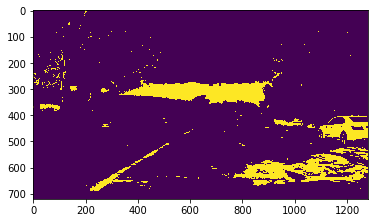

In [82]:
wy_binary=cf.transform(difficult_image)
plt.imshow(wy_binary)

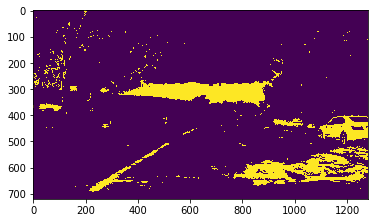

In [83]:
combined=np.zeros_like(dir_binary)
combined[((gradx==1) & (grady==1))|(wy_binary==1)]=1
plt.imshow(combined)

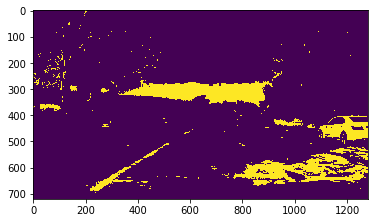

In [84]:
combined=np.zeros_like(dir_binary)
combined[((dir_binary==1) & (mag_binary==1))|(wy_binary==1)]=1
plt.imshow(combined)

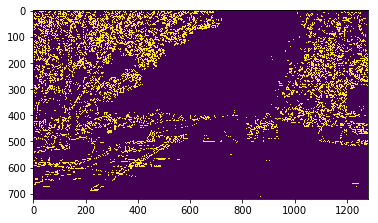

In [85]:
mag_binary=mag_thresh(hls[:,:,2],mag_thresh=(50,150),to_gray=False)
plt.imshow(mag_binary)

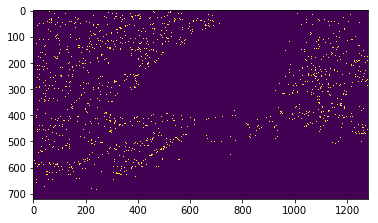

In [86]:
combined=np.zeros_like(dir_binary)
combined[((dir_binary_2==1) & (mag_binary==1))]=1
plt.imshow(combined)

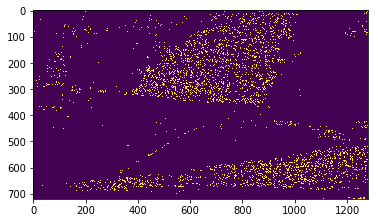

In [91]:
combined=np.zeros_like(dir_binary)
combined[((dir_binary_2==1) & (s_binary_1==1))]=1
plt.imshow(combined)

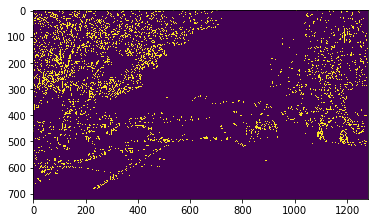

In [87]:
_,ege=edge_pipeline(difficult_image)
plt.imshow(ege)

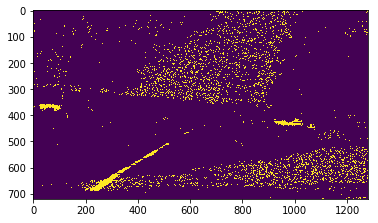

In [94]:
combined=np.zeros_like(s_binary_2)
combined[((s_binary_1==1) & (dir_binary==1))|(yellow_binary==255)]=1
plt.imshow(combined)